In [1]:
# Criando um árvore de decisão a partir do dataset titanic

# Obs: Caso tenha problemas com a acentuação, consulte este link:
# https://support.rstudio.com/hc/en-us/articles/200532197-Character-Encoding

# Definindo o diretório de trabalho
getwd()
#setwd("~/Dropbox/DSA/MachineLearning2.0/Cap08/R")

[1] "C:/Users/cassi/OneDrive/Programação/DSA/MachineLearning2.0/Cap08-R"

In [2]:
# Gerando o dataset
data(Titanic, package = "datasets") 

In [4]:
# Criando o dataframe
dataset <- as.data.frame(Titanic) 
head(dataset)

Class,Sex,Age,Survived,Freq
1st,Male,Child,No,0
2nd,Male,Child,No,0
3rd,Male,Child,No,35
Crew,Male,Child,No,0
1st,Female,Child,No,0
2nd,Female,Child,No,0


In [5]:
# Carregando o pacote
install.packages("rpart")
library(rpart)

package 'rpart' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rpart'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\cassi\anaconda3\envs\r-tutorial\Lib\R\library\00LOCK\rpart\libs\x64\rpart.dll to C:\Users\cassi\anaconda3\envs\r-tutorial\Lib\R\library\rpart\libs\x64\rpart.dll: Permission denied"Warning message:
"restored 'rpart'"


The downloaded binary packages are in
	C:\Users\cassi\AppData\Local\Temp\RtmpEHuTjM\downloaded_packages


Warning message:
"package 'rpart' was built under R version 3.6.3"

In [7]:
?rpart

In [6]:
# Criando o modelo
titanic_tree <- rpart(Survived ~ Class + Sex + Age, 
                      data = dataset, 
                      weights = Freq, 
                      method = "class", 
                      parms = list(split = "information"), 
                      control = rpart.control(minsplit = 5)) 

titanic_tree

n= 32 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 32 711 No (0.6769650 0.3230350)  
   2) Sex=Male 16 367 No (0.7879838 0.2120162)  
     4) Age=Adult 8 338 No (0.7972406 0.2027594) *
     5) Age=Child 8  29 No (0.5468750 0.4531250)  
      10) Class=3rd 2  13 No (0.7291667 0.2708333) *
      11) Class=1st,2nd 4   0 Yes (0.0000000 1.0000000) *
   3) Sex=Female 16 126 Yes (0.2680851 0.7319149)  
     6) Class=3rd 4  90 No (0.5408163 0.4591837) *
     7) Class=1st,2nd,Crew 12  20 Yes (0.0729927 0.9270073) *

In [8]:
# Aplicando o Prune
?prune
pruned_titanic_tree <- prune(titanic_tree, cp = 0.02)
pruned_titanic_tree

n= 32 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 32 711 No (0.6769650 0.3230350)  
  2) Sex=Male 16 367 No (0.7879838 0.2120162) *
  3) Sex=Female 16 126 Yes (0.2680851 0.7319149)  
    6) Class=3rd 4  90 No (0.5408163 0.4591837) *
    7) Class=1st,2nd,Crew 12  20 Yes (0.0729927 0.9270073) *

In [9]:
# Carregando o pacote rpart.plot
install.packages("rpart.plot")
library(rpart.plot) 

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cassi\AppData\Local\Temp\RtmpEHuTjM\downloaded_packages


Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

## Imprimindo a árvore antes e depois do Prune

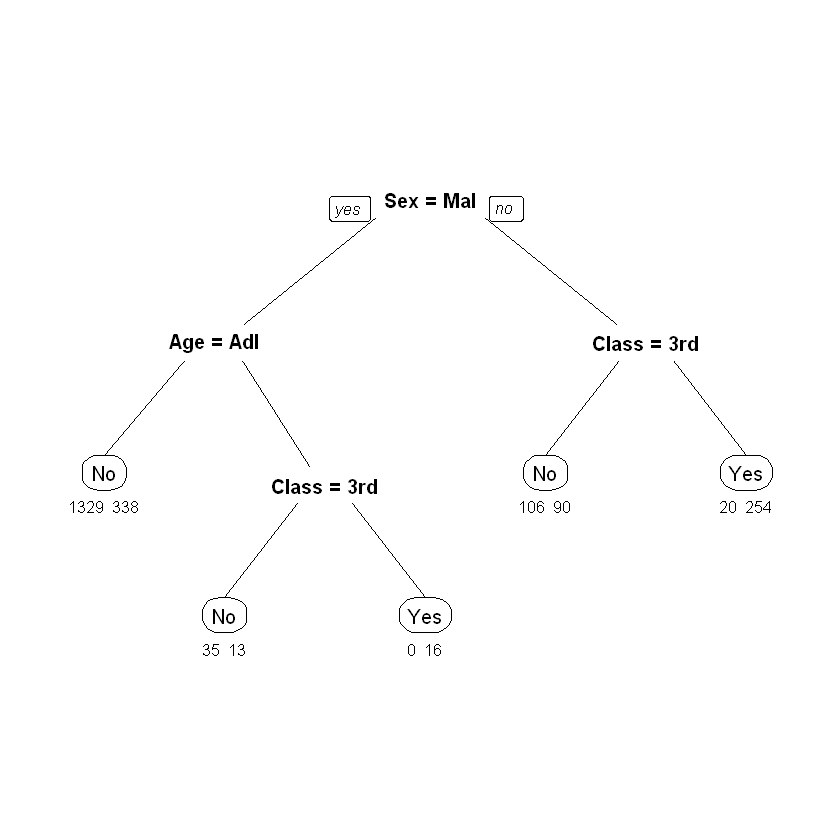

In [10]:
# Antes do Pruning
prp(titanic_tree, type = 0, extra = 1, under = TRUE, compress = TRUE)

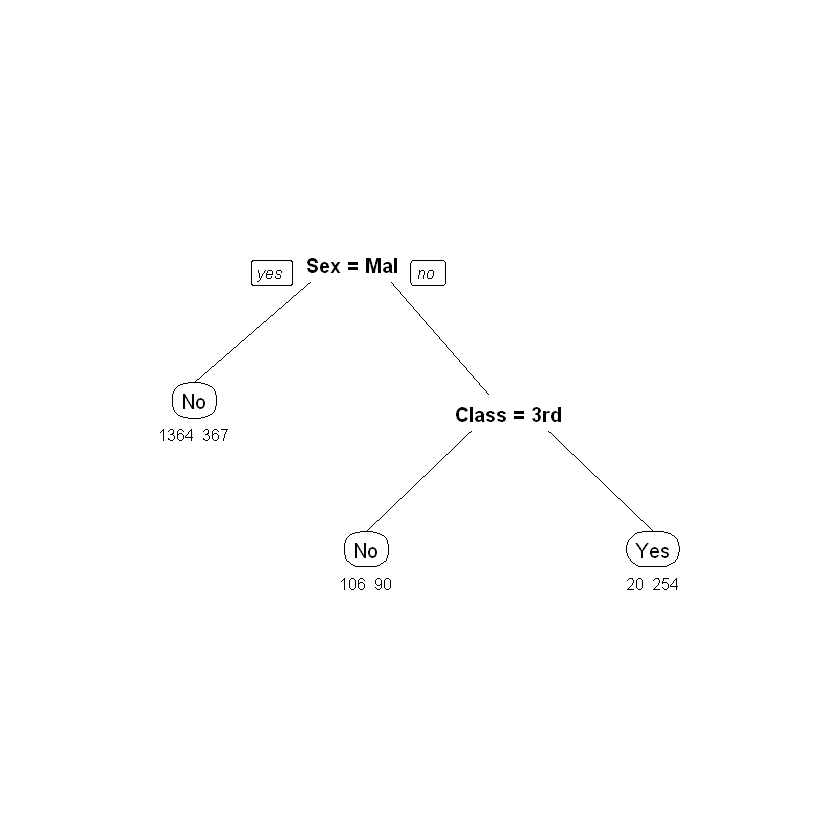

In [11]:
# Depois do Pruning
prp(pruned_titanic_tree, type = 0, extra = 1, under = TRUE, compress = TRUE)